In [1]:
import sys
sys.path.append("../source")

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab
from tqdm import trange
import scipy
import scipy.stats as stats
from scipy.stats import bernoulli
import matplotlib as mp
from numba import njit
from project_lib import *
import pandas as pd

In [3]:
def init_beta_distrib_consensus_data(beta_distib_consensus_data, experiment, N, alpha, beta, R):
    beta_distib_consensus_data.at[experiment, "N"] = N
    beta_distib_consensus_data.at[experiment, "alpha"] = alpha
    beta_distib_consensus_data.at[experiment, "beta"] = beta
    beta_distib_consensus_data.at[experiment, "eps"] = R
    beta_distib_consensus_data.at[experiment, "consensus_x"] = 0
    beta_distib_consensus_data.at[experiment, "consensus_y"] = 0
    beta_distib_consensus_data.at[experiment, "consensus_probabity"] =0
    beta_distib_consensus_data.at[experiment, "simulation_time"] =0
def update_beta_distrib_consensus_data(beta_distib_consensus_data, experiment, res_arr_fast):
    beta_distib_consensus_data.at[experiment, "consensus_x"] += res_arr_fast[-1, 0, 0]
    beta_distib_consensus_data.at[experiment, "consensus_y"] += res_arr_fast[-1, 0, 1]
    beta_distib_consensus_data.at[experiment, "consensus_probabity"] +=1
    beta_distib_consensus_data.at[experiment, "simulation_time"] +=res_arr_fast.shape[0]
    
beta_distib_consensus_data = pd.DataFrame(columns=["N", "alpha", "beta", "eps", "consensus_x", "consensus_y","consensus_probabity", "simulation_time"], dtype=object)
beta_distib_consensus_data

,N,alpha,beta,eps,consensus_x,consensus_y,consensus_probabity,simulation_time


In [4]:
R = 0.2  # радиус доверия
eps = 1e-4  # допустимая точность
n = 50  # количество агентов по одной оси
N = n*n

In [5]:
experiments = 10
R_array = np.arange(0.15, 0.51, 0.05)
beta_params_array =  np.arange(0.5, 5.1, 0.5)
beta_params_array

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [14]:
R_array

array([0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

In [9]:
experiment = 0
simulation_func = HK_2D_sim_fast
count_consensus = 0
CONSENSUS_BORDER = 5
for R in R_array:
    for beta in beta_params_array:
        alpha = beta
        init_beta_distrib_consensus_data(beta_distib_consensus_data, experiment, N, alpha, beta, R)
        if count_consensus>=CONSENSUS_BORDER: simulation_func=HK_2D_sim
        print(f"N:{N} R:{R} a:{alpha} b:{beta} func:{simulation_func.__name__} count:{count_consensus}")

        for i in trange(experiments):
            x0 = np.random.beta(alpha, beta, (N,2))
            res_arr_fast, check_fast = simulation_func(x0, R, R * 1e-3, 1000)
            if check_fast:
                cluster_of_agent, cluster_sizes = caln_n_clusters(res_arr_fast[-1, :, :], R)
                if len(cluster_sizes)==1:
                    # we have consensus
                    count_consensus+=1
                    update_beta_distrib_consensus_data(beta_distib_consensus_data, experiment, res_arr_fast)
            else:
                draw_HK_2D_simulation(res_arr_fast, 'plasma')
        experiment+=1

N:2500 R:0.15 a:0.5 b:0.5 func:HK_2D_sim_fast count:0


100%|██████████| 10/10 [02:03<00:00, 12.34s/it]


N:2500 R:0.15 a:1.0 b:1.0 func:HK_2D_sim_fast count:0


100%|██████████| 10/10 [03:12<00:00, 19.24s/it]


N:2500 R:0.15 a:1.5 b:1.5 func:HK_2D_sim_fast count:0


100%|██████████| 10/10 [12:38<00:00, 75.86s/it]


N:2500 R:0.15 a:2.0 b:2.0 func:HK_2D_sim_fast count:0


100%|██████████| 10/10 [15:16<00:00, 91.60s/it]  


N:2500 R:0.15 a:2.5 b:2.5 func:HK_2D_sim_fast count:0


100%|██████████| 10/10 [11:57<00:00, 71.76s/it]


N:2500 R:0.15 a:3.0 b:3.0 func:HK_2D_sim count:8


100%|██████████| 10/10 [03:12<00:00, 19.26s/it]


N:2500 R:0.15 a:3.5 b:3.5 func:HK_2D_sim count:18


100%|██████████| 10/10 [02:57<00:00, 17.76s/it]


N:2500 R:0.15 a:4.0 b:4.0 func:HK_2D_sim count:28


100%|██████████| 10/10 [02:43<00:00, 16.37s/it]


N:2500 R:0.15 a:4.5 b:4.5 func:HK_2D_sim count:37


100%|██████████| 10/10 [02:41<00:00, 16.16s/it]


N:2500 R:0.15 a:5.0 b:5.0 func:HK_2D_sim count:47


100%|██████████| 10/10 [02:34<00:00, 15.44s/it]


N:2500 R:0.2 a:0.5 b:0.5 func:HK_2D_sim count:57


100%|██████████| 10/10 [07:32<00:00, 45.26s/it]


N:2500 R:0.2 a:1.0 b:1.0 func:HK_2D_sim count:57


100%|██████████| 10/10 [16:34<00:00, 99.42s/it]


N:2500 R:0.2 a:1.5 b:1.5 func:HK_2D_sim count:57


100%|██████████| 10/10 [11:39<00:00, 69.97s/it]


N:2500 R:0.2 a:2.0 b:2.0 func:HK_2D_sim count:66


100%|██████████| 10/10 [02:48<00:00, 16.82s/it]


N:2500 R:0.2 a:2.5 b:2.5 func:HK_2D_sim count:76


100%|██████████| 10/10 [02:21<00:00, 14.11s/it]


N:2500 R:0.2 a:3.0 b:3.0 func:HK_2D_sim count:86


100%|██████████| 10/10 [02:18<00:00, 13.89s/it]


N:2500 R:0.2 a:3.5 b:3.5 func:HK_2D_sim count:96


100%|██████████| 10/10 [02:19<00:00, 13.91s/it]


N:2500 R:0.2 a:4.0 b:4.0 func:HK_2D_sim count:106


100%|██████████| 10/10 [02:02<00:00, 12.30s/it]


N:2500 R:0.2 a:4.5 b:4.5 func:HK_2D_sim count:116


100%|██████████| 10/10 [01:56<00:00, 11.67s/it]


N:2500 R:0.2 a:5.0 b:5.0 func:HK_2D_sim count:126


100%|██████████| 10/10 [01:56<00:00, 11.68s/it]


N:2500 R:0.25 a:0.5 b:0.5 func:HK_2D_sim count:135


100%|██████████| 10/10 [04:03<00:00, 24.35s/it]


N:2500 R:0.25 a:1.0 b:1.0 func:HK_2D_sim count:135


100%|██████████| 10/10 [10:34<00:00, 63.43s/it]


N:2500 R:0.25 a:1.5 b:1.5 func:HK_2D_sim count:143


100%|██████████| 10/10 [02:27<00:00, 14.79s/it]


N:2500 R:0.25 a:2.0 b:2.0 func:HK_2D_sim count:153


100%|██████████| 10/10 [02:20<00:00, 14.02s/it]


N:2500 R:0.25 a:2.5 b:2.5 func:HK_2D_sim count:163


100%|██████████| 10/10 [01:56<00:00, 11.68s/it]


N:2500 R:0.25 a:3.0 b:3.0 func:HK_2D_sim count:173


100%|██████████| 10/10 [01:55<00:00, 11.56s/it]


N:2500 R:0.25 a:3.5 b:3.5 func:HK_2D_sim count:183


100%|██████████| 10/10 [01:55<00:00, 11.56s/it]


N:2500 R:0.25 a:4.0 b:4.0 func:HK_2D_sim count:193


100%|██████████| 10/10 [01:55<00:00, 11.54s/it]


N:2500 R:0.25 a:4.5 b:4.5 func:HK_2D_sim count:203


100%|██████████| 10/10 [01:55<00:00, 11.57s/it]


N:2500 R:0.25 a:5.0 b:5.0 func:HK_2D_sim count:213


100%|██████████| 10/10 [01:32<00:00,  9.23s/it]


N:2500 R:0.30000000000000004 a:0.5 b:0.5 func:HK_2D_sim count:223


100%|██████████| 10/10 [1:10:36<00:00, 423.62s/it]


N:2500 R:0.30000000000000004 a:1.0 b:1.0 func:HK_2D_sim count:224


100%|██████████| 10/10 [02:43<00:00, 16.31s/it]


N:2500 R:0.30000000000000004 a:1.5 b:1.5 func:HK_2D_sim count:234


100%|██████████| 10/10 [01:56<00:00, 11.65s/it]


N:2500 R:0.30000000000000004 a:2.0 b:2.0 func:HK_2D_sim count:244


100%|██████████| 10/10 [01:56<00:00, 11.68s/it]


N:2500 R:0.30000000000000004 a:2.5 b:2.5 func:HK_2D_sim count:254


100%|██████████| 10/10 [01:56<00:00, 11.70s/it]


N:2500 R:0.30000000000000004 a:3.0 b:3.0 func:HK_2D_sim count:264


100%|██████████| 10/10 [01:35<00:00,  9.58s/it]


N:2500 R:0.30000000000000004 a:3.5 b:3.5 func:HK_2D_sim count:274


100%|██████████| 10/10 [01:33<00:00,  9.35s/it]


N:2500 R:0.30000000000000004 a:4.0 b:4.0 func:HK_2D_sim count:284


100%|██████████| 10/10 [01:33<00:00,  9.34s/it]


N:2500 R:0.30000000000000004 a:4.5 b:4.5 func:HK_2D_sim count:294


100%|██████████| 10/10 [01:33<00:00,  9.36s/it]


N:2500 R:0.30000000000000004 a:5.0 b:5.0 func:HK_2D_sim count:304


100%|██████████| 10/10 [01:33<00:00,  9.32s/it]


N:2500 R:0.3500000000000001 a:0.5 b:0.5 func:HK_2D_sim count:314


100%|██████████| 10/10 [11:04<00:00, 66.44s/it]


N:2500 R:0.3500000000000001 a:1.0 b:1.0 func:HK_2D_sim count:324


100%|██████████| 10/10 [01:56<00:00, 11.69s/it]


N:2500 R:0.3500000000000001 a:1.5 b:1.5 func:HK_2D_sim count:334


100%|██████████| 10/10 [01:57<00:00, 11.72s/it]


N:2500 R:0.3500000000000001 a:2.0 b:2.0 func:HK_2D_sim count:344


100%|██████████| 10/10 [01:33<00:00,  9.34s/it]


N:2500 R:0.3500000000000001 a:2.5 b:2.5 func:HK_2D_sim count:354


100%|██████████| 10/10 [01:33<00:00,  9.34s/it]


N:2500 R:0.3500000000000001 a:3.0 b:3.0 func:HK_2D_sim count:364


100%|██████████| 10/10 [01:33<00:00,  9.32s/it]


N:2500 R:0.3500000000000001 a:3.5 b:3.5 func:HK_2D_sim count:374


100%|██████████| 10/10 [01:33<00:00,  9.37s/it]


N:2500 R:0.3500000000000001 a:4.0 b:4.0 func:HK_2D_sim count:384


100%|██████████| 10/10 [01:33<00:00,  9.34s/it]


N:2500 R:0.3500000000000001 a:4.5 b:4.5 func:HK_2D_sim count:394


100%|██████████| 10/10 [01:33<00:00,  9.34s/it]


N:2500 R:0.3500000000000001 a:5.0 b:5.0 func:HK_2D_sim count:404


100%|██████████| 10/10 [01:33<00:00,  9.33s/it]


N:2500 R:0.40000000000000013 a:0.5 b:0.5 func:HK_2D_sim count:414


100%|██████████| 10/10 [03:06<00:00, 18.60s/it]


N:2500 R:0.40000000000000013 a:1.0 b:1.0 func:HK_2D_sim count:424


100%|██████████| 10/10 [01:55<00:00, 11.60s/it]


N:2500 R:0.40000000000000013 a:1.5 b:1.5 func:HK_2D_sim count:434


100%|██████████| 10/10 [01:32<00:00,  9.30s/it]


N:2500 R:0.40000000000000013 a:2.0 b:2.0 func:HK_2D_sim count:444


100%|██████████| 10/10 [01:32<00:00,  9.27s/it]


N:2500 R:0.40000000000000013 a:2.5 b:2.5 func:HK_2D_sim count:454


100%|██████████| 10/10 [01:32<00:00,  9.28s/it]


N:2500 R:0.40000000000000013 a:3.0 b:3.0 func:HK_2D_sim count:464


100%|██████████| 10/10 [01:32<00:00,  9.30s/it]


N:2500 R:0.40000000000000013 a:3.5 b:3.5 func:HK_2D_sim count:474


100%|██████████| 10/10 [01:32<00:00,  9.29s/it]


N:2500 R:0.40000000000000013 a:4.0 b:4.0 func:HK_2D_sim count:484


100%|██████████| 10/10 [01:32<00:00,  9.29s/it]


N:2500 R:0.40000000000000013 a:4.5 b:4.5 func:HK_2D_sim count:494


100%|██████████| 10/10 [01:25<00:00,  8.58s/it]


N:2500 R:0.40000000000000013 a:5.0 b:5.0 func:HK_2D_sim count:504


100%|██████████| 10/10 [01:09<00:00,  6.99s/it]


N:2500 R:0.45000000000000007 a:0.5 b:0.5 func:HK_2D_sim count:514


100%|██████████| 10/10 [02:17<00:00, 13.71s/it]


N:2500 R:0.45000000000000007 a:1.0 b:1.0 func:HK_2D_sim count:524


100%|██████████| 10/10 [01:32<00:00,  9.29s/it]


N:2500 R:0.45000000000000007 a:1.5 b:1.5 func:HK_2D_sim count:534


100%|██████████| 10/10 [01:33<00:00,  9.33s/it]


N:2500 R:0.45000000000000007 a:2.0 b:2.0 func:HK_2D_sim count:544


100%|██████████| 10/10 [01:33<00:00,  9.32s/it]


N:2500 R:0.45000000000000007 a:2.5 b:2.5 func:HK_2D_sim count:554


100%|██████████| 10/10 [01:33<00:00,  9.30s/it]


N:2500 R:0.45000000000000007 a:3.0 b:3.0 func:HK_2D_sim count:564


100%|██████████| 10/10 [01:33<00:00,  9.32s/it]


N:2500 R:0.45000000000000007 a:3.5 b:3.5 func:HK_2D_sim count:574


100%|██████████| 10/10 [01:09<00:00,  6.99s/it]


N:2500 R:0.45000000000000007 a:4.0 b:4.0 func:HK_2D_sim count:584


100%|██████████| 10/10 [01:09<00:00,  6.97s/it]


N:2500 R:0.45000000000000007 a:4.5 b:4.5 func:HK_2D_sim count:594


100%|██████████| 10/10 [01:09<00:00,  6.98s/it]


N:2500 R:0.45000000000000007 a:5.0 b:5.0 func:HK_2D_sim count:604


100%|██████████| 10/10 [01:09<00:00,  6.98s/it]


N:2500 R:0.5000000000000001 a:0.5 b:0.5 func:HK_2D_sim count:614


100%|██████████| 10/10 [01:56<00:00, 11.62s/it]


N:2500 R:0.5000000000000001 a:1.0 b:1.0 func:HK_2D_sim count:624


100%|██████████| 10/10 [01:33<00:00,  9.31s/it]


N:2500 R:0.5000000000000001 a:1.5 b:1.5 func:HK_2D_sim count:634


100%|██████████| 10/10 [01:32<00:00,  9.30s/it]


N:2500 R:0.5000000000000001 a:2.0 b:2.0 func:HK_2D_sim count:644


100%|██████████| 10/10 [01:32<00:00,  9.30s/it]


N:2500 R:0.5000000000000001 a:2.5 b:2.5 func:HK_2D_sim count:654


100%|██████████| 10/10 [01:12<00:00,  7.29s/it]


N:2500 R:0.5000000000000001 a:3.0 b:3.0 func:HK_2D_sim count:664


100%|██████████| 10/10 [01:09<00:00,  6.99s/it]


N:2500 R:0.5000000000000001 a:3.5 b:3.5 func:HK_2D_sim count:674


100%|██████████| 10/10 [01:09<00:00,  6.98s/it]


N:2500 R:0.5000000000000001 a:4.0 b:4.0 func:HK_2D_sim count:684


100%|██████████| 10/10 [01:09<00:00,  6.97s/it]


N:2500 R:0.5000000000000001 a:4.5 b:4.5 func:HK_2D_sim count:694


100%|██████████| 10/10 [01:10<00:00,  7.01s/it]


N:2500 R:0.5000000000000001 a:5.0 b:5.0 func:HK_2D_sim count:704


100%|██████████| 10/10 [01:09<00:00,  6.96s/it]


In [6]:
beta = beta_params_array[0]
alpha = beta
R = R_array[0]
x0 = np.random.beta(alpha, beta, (N,2))
x0.mean()

0.5074191306291649

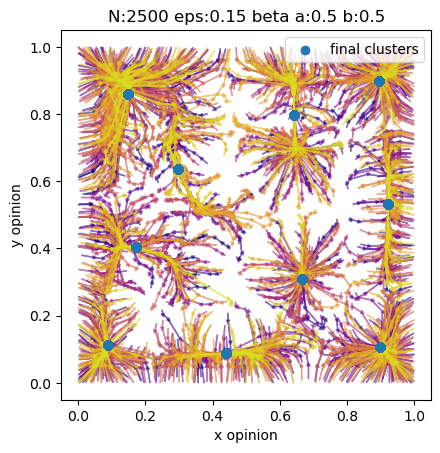

,N,alpha,beta,eps,consensus_x,consensus_y,consensus_probabity,simulation_time
0,2500,0.5,0.5,0.15,0,0,0,0


In [7]:
experiment = 0
init_beta_distrib_consensus_data(beta_distib_consensus_data, experiment, N, alpha, beta, R)
res_arr_fast, check_fast = HK_2D_sim_fast(x0, R, R * 1e-3, 1000)

np.save(f"2dHKN{N}R{R}_beta_a{alpha}_b{beta}.npy", res_arr_fast)

draw_HK_2D_simulation(res_arr_fast,N=N, R=R,text=f"beta a:{alpha} b:{beta}", cmap='plasma')
cluster_of_agent, cluster_sizes = caln_n_clusters(res_arr_fast[-1, :, :], R)
if len(cluster_sizes)==1:
    # we have consensus
    update_beta_distrib_consensus_data(beta_distib_consensus_data, experiment, res_arr_fast)

beta_distib_consensus_data

In [10]:
beta_distib_consensus_data.to_csv('beta_distib_consensus_data.csv',sep=";", index=False)

,N,alpha,beta,eps,consensus_x,consensus_y,consensus_probabity,simulation_time
0,2500,0.5,0.5,0.15,0,0,0,0
1,2500,1.0,1.0,0.15,0,0,0,0
2,2500,1.5,1.5,0.15,0,0,0,0
3,2500,2.0,2.0,0.15,0,0,0,0
4,2500,2.5,2.5,0.15,4.003754633228054,3.964976992208546,8,153


In [14]:
dtypes = {
    'N': np.int64,
    'alpha': np.float64,
    'beta': np.float64,
    'eps': np.float64,
    'consensus_x': np.float64,
    'consensus_y': np.float64,
    'consensus_probabity': np.float64,
    'simulation_time': np.int64
}

data = pd.read_csv('beta_distib_consensus_data.csv', sep=";", dtype=dtypes)
data


,N,alpha,beta,eps,consensus_x,consensus_y,consensus_probabity,simulation_time
0,2500,0.5,0.5,0.15,0.000000,0.000000,0.0,0
1,2500,1.0,1.0,0.15,0.000000,0.000000,0.0,0
2,2500,1.5,1.5,0.15,0.000000,0.000000,0.0,0
3,2500,2.0,2.0,0.15,0.000000,0.000000,0.0,0
4,2500,2.5,2.5,0.15,4.003755,3.964977,8.0,153
...,...,...,...,...,...,...,...,...
75,2500,3.0,3.0,0.50,4.999955,5.002421,10.0,30
76,2500,3.5,3.5,0.50,4.987705,5.012884,10.0,30
77,2500,4.0,4.0,0.50,4.999360,5.018445,10.0,30
78,2500,4.5,4.5,0.50,4.987063,4.998372,10.0,30


In [18]:
# data.consensus_x=np.where(data.consensus_x!=0,data.consensus_x/data.consensus_probabity, 0)
# data.consensus_y=np.where(data.consensus_y!=0,data.consensus_y/data.consensus_probabity, 0)
data.consensus_probabity = data.consensus_probabity/10
data

,N,alpha,beta,eps,consensus_x,consensus_y,consensus_probabity,simulation_time
0,2500,0.5,0.5,0.15,0.000000,0.000000,0.0,0
1,2500,1.0,1.0,0.15,0.000000,0.000000,0.0,0
2,2500,1.5,1.5,0.15,0.000000,0.000000,0.0,0
3,2500,2.0,2.0,0.15,0.000000,0.000000,0.0,0
4,2500,2.5,2.5,0.15,0.500469,0.495622,0.8,153
...,...,...,...,...,...,...,...,...
75,2500,3.0,3.0,0.50,0.499995,0.500242,1.0,30
76,2500,3.5,3.5,0.50,0.498770,0.501288,1.0,30
77,2500,4.0,4.0,0.50,0.499936,0.501845,1.0,30
78,2500,4.5,4.5,0.50,0.498706,0.499837,1.0,30


In [26]:
pivot_data = data.pivot(index='eps', columns='beta', values='consensus_probabity')
pivot_data

beta,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
eps,,,,,,,,,,
0.15,0.0,0.0,0.0,0.0,0.8,1.0,1.0,0.9,1.0,1.0
0.20,0.0,0.0,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9
0.25,0.0,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.30,0.1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.35,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.45,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


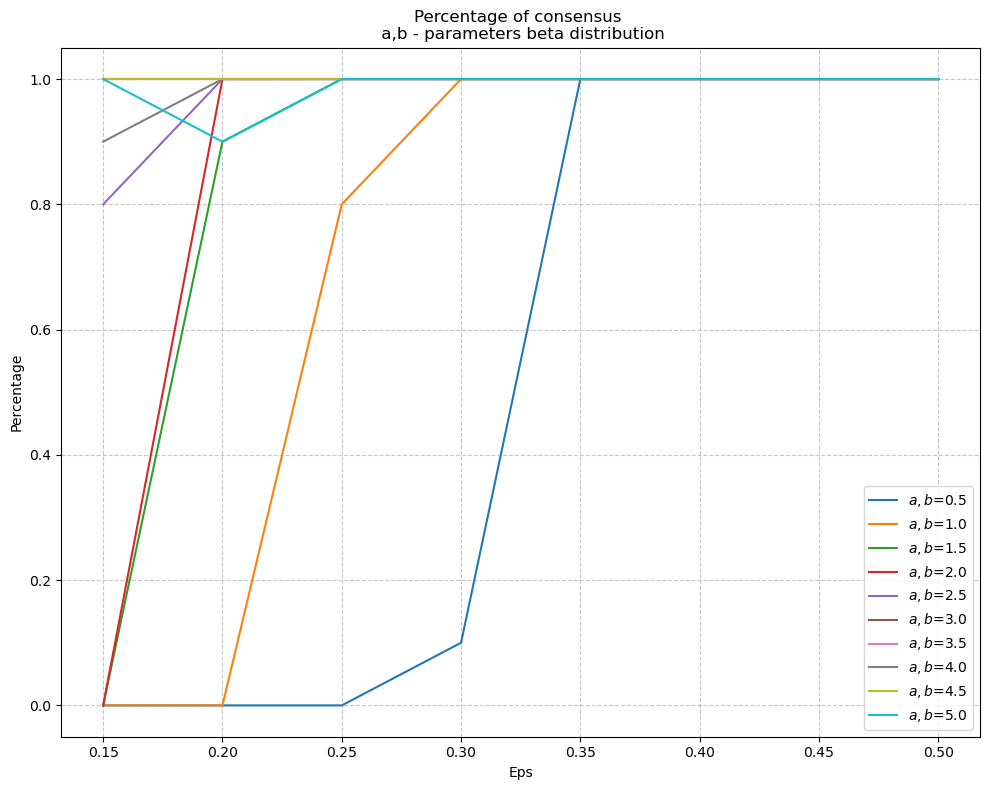

In [24]:
plt.figure(figsize=(10, 8))

# Plot lines for each beta value
for beta in beta_params_array:
    df = data[data['beta'] == beta]
    plt.plot(df['eps'], df['consensus_probabity'], label=f'$a, b$={round(beta,2)}')

# Adding the HK_sample line (you'll need to adjust this based on your actual data)
plt.title('Percentage of consensus \n a,b - parameters beta distribution')
plt.xlabel('Eps')
plt.ylabel('Percentage')
plt.legend()
# Add a grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [29]:
res_arr_fast, check_fast = HK_2D_sim_fast(x0, R, R * 1e-3, 1000)
res_arr, check = HK_2D_sim(x0, R, R * 1e-3, 1000)


In [39]:
res_arr_fast.shape[0]

5

In [30]:
%timeit HK_2D_sim_fast(x0, R, R * 1e-3, 1000)

5.17 ms ± 54.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%timeit HK_2D_sim(x0, R, R * 1e-3, 1000)

4.67 ms ± 61.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
np.testing.assert_allclose(res_arr_fast, res_arr_fast, 1e-10)

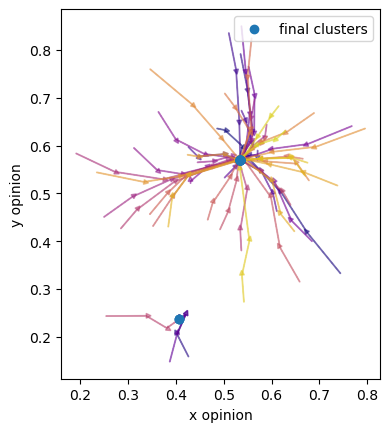

In [36]:
draw_HK_2D_simulation(res_arr, 'plasma')

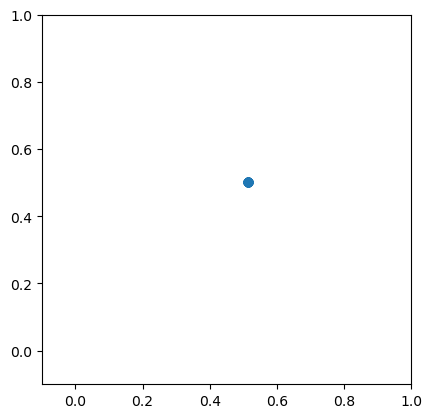

In [11]:
animate_HK_2D_simulation(res_arr[:10], 'beta.gif')

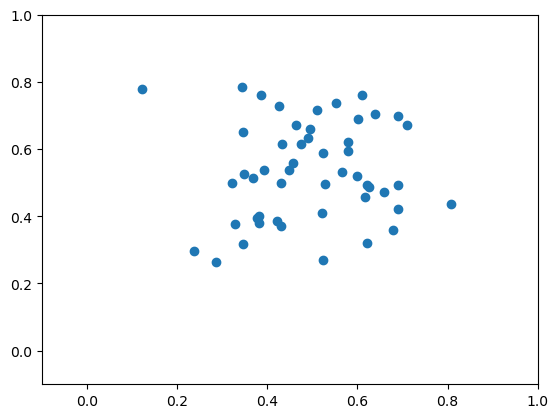

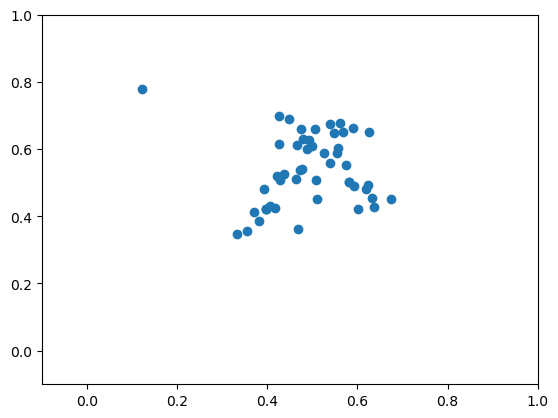

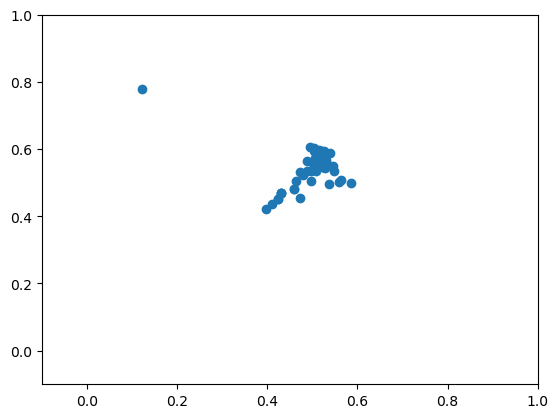

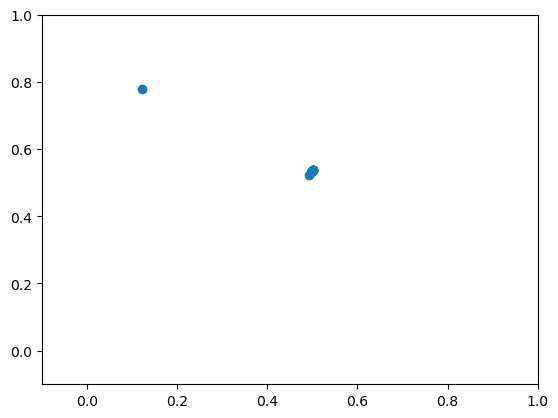

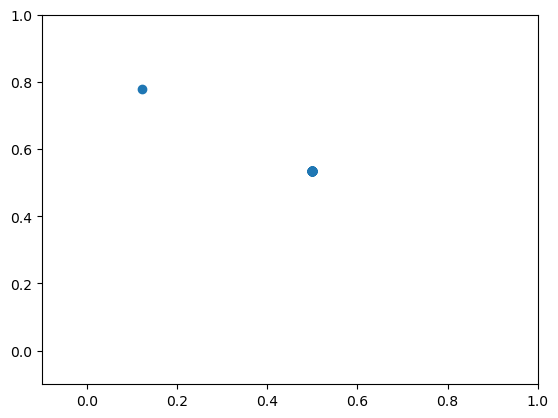

In [11]:
HK_2D_display_steps(res_arr)